# Imports

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
credit = pd.read_csv('/content/drive/MyDrive/UW/WXML/credit_astro.csv')

# Data Examining and Cleaning

In [6]:
credit['Date_Birth'] = pd.to_datetime(credit['Date_Birth'], format='%Y-%m-%d')
credit['Date_Employed'] = pd.to_datetime(credit['Date_Employed'], format='%Y-%m-%d')

In [7]:
credit['birth_epoch'] = credit['Date_Birth'].astype('int64') // 1e9
credit['employed_epoch'] = credit['Date_Employed'].astype('int64') // 1e9

In [8]:
credit

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,...,Date_Birth,Date_Employed,Sign_Birth,higher_Sign_Birth,lower_Sign_Birth,year_Birth,month_Birth,day_Birth,birth_epoch,employed_epoch
0,0,1,1,0,427500.0,3,0,0,12005,4542,...,1987-05-12,2007-10-17,"[2, 8, 2, 1, 3, 1, 9, 9, 10]",4180419301,683833065,1987,5,12,547776000.0,1.192579e+09
1,0,1,1,0,112500.0,1,1,1,21474,1134,...,1961-06-08,2017-02-14,"[3, 1, 4, 2, 5, 11, 10, 5, 8]",3182646386,869271751,1961,6,8,-270345600.0,1.487030e+09
2,1,0,1,0,270000.0,1,2,1,19110,3051,...,1967-11-28,2011-11-16,"[9, 7, 8, 7, 10, 6, 1, 6, 8]",3190473152,3677434627,1967,11,28,-66096000.0,1.321402e+09
3,0,1,1,0,270000.0,3,1,1,16872,769,...,1974-01-13,2018-02-14,"[10, 6, 10, 11, 2, 11, 3, 7, 9]",3663344085,4078394864,1974,1,13,127267200.0,1.518566e+09
4,0,1,1,0,135000.0,1,1,1,17778,1194,...,1971-07-22,2016-12-16,"[4, 4, 5, 4, 11, 8, 3, 7, 9]",3662771367,1410350768,1971,7,22,48988800.0,1.481846e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74393,1,0,0,2,90000.0,3,2,1,16062,1275,...,1976-04-02,2016-09-26,"[1, 2, 1, 12, 4, 2, 4, 8, 9]",3699964236,38633420,1976,4,2,197251200.0,1.474848e+09
74394,0,0,0,1,135000.0,1,3,1,12972,179,...,1984-09-17,2019-09-27,"[6, 3, 6, 7, 9, 10, 8, 9, 9]",3749826413,2238177560,1984,9,17,464227200.0,1.569542e+09
74395,0,0,1,0,202500.0,3,0,1,13510,2309,...,1983-03-29,2013-11-27,"[1, 7, 1, 2, 1, 9, 8, 9, 9]",3749402376,215254616,1983,3,29,417744000.0,1.385510e+09
74396,1,0,1,0,180000.0,3,1,1,10966,2704,...,1990-03-16,2012-10-28,"[12, 8, 12, 11, 11, 4, 10, 10, 10]",4220168207,5016169413,1990,3,16,637545600.0,1.351382e+09


In [9]:
credit['year'] = credit['Date_Birth'].dt.year
credit['month'] = credit['Date_Birth'].dt.month
credit['day'] = credit['Date_Birth'].dt.day

# Correlation

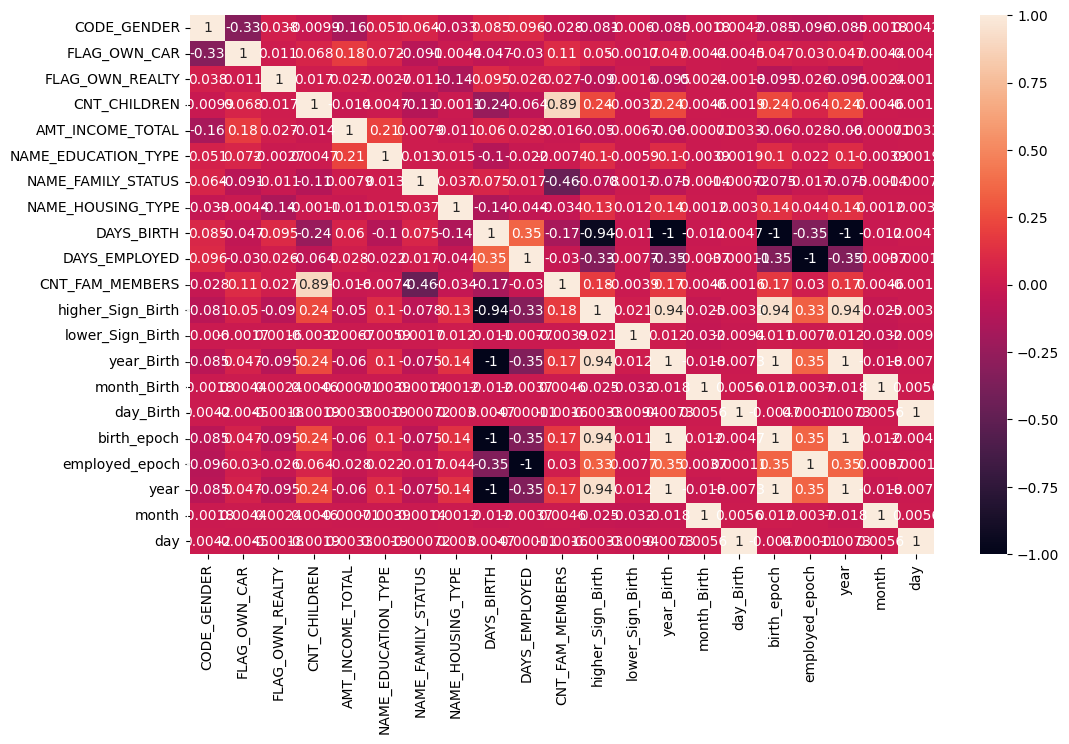

In [10]:
cols_list = credit.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(credit[cols_list].corr(), annot = True) #annotation shows the numbers in each box
plt.show()

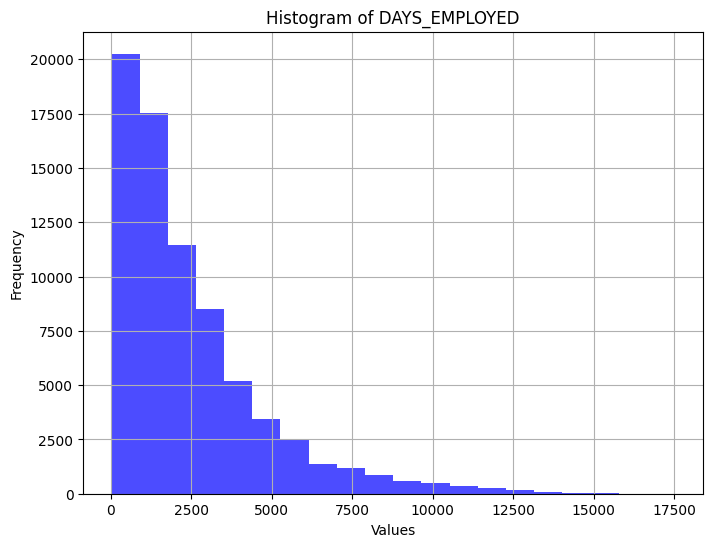

In [11]:
plt.figure(figsize=(8, 6))  # Set the size of the plot
plt.hist(credit['DAYS_EMPLOYED'], bins=20, color='blue', alpha=0.7)  # Bins define the number of segments
plt.title(f'Histogram of DAYS_EMPLOYED')  # Title of the histogram
plt.xlabel('Values')  # Label for the X-axis
plt.ylabel('Frequency')  # Label for the Y-axis
plt.grid(True)  # Optional: adds a grid for easier readability
plt.show()  # Display the plot

Looking at the distribution of days_employed and considering transformation

# Pre-ML

In [12]:
predict = 'FLAG_OWN_CAR'

In [13]:
y = credit[predict]

In [14]:
# X = credit.drop(columns = [predict, 'Sign_Birth', 'higher_Sign_Birth', 'lower_Sign_Birth', 'birth_epoch',
                           #'year', 'month', 'day', 'Date_Birth',	'Date_Employed'])
X = credit[['CODE_GENDER', 'AMT_INCOME_TOTAL',
            'month_Birth', 'day_Birth']]
# X = credit[['AMT_INCOME_TOTAL', 'CODE_GENDER', 'CNT_FAM_MEMBERS', 'NAME_EDUCATION_TYPE', 'CNT_CHILDREN', 'FLAG_OWN_REALTY', 'higher_Sign_Birth', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']]

I am defining different sets of features to use, the ones not being used on commented out.

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1,stratify=y)

In [16]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Decision Tree

In [17]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Trying to overfit with training data

              precision    recall  f1-score   support

           0       0.78      0.91      0.84     35857
           1       0.81      0.61      0.70     23661

    accuracy                           0.79     59518
   macro avg       0.79      0.76      0.77     59518
weighted avg       0.79      0.79      0.78     59518



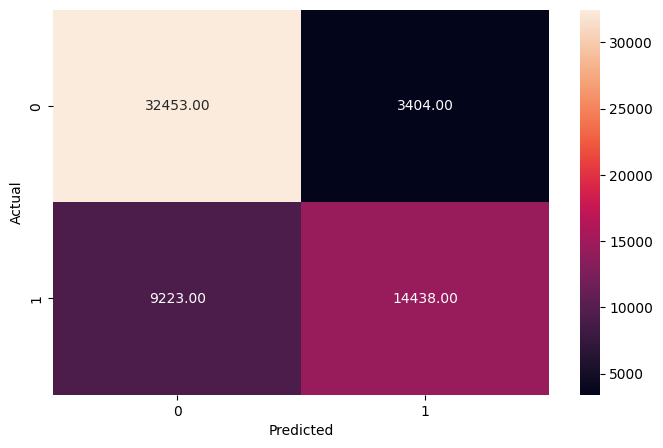

In [18]:
pred_train = model.predict(X_train)
metrics_score(y_train, pred_train)

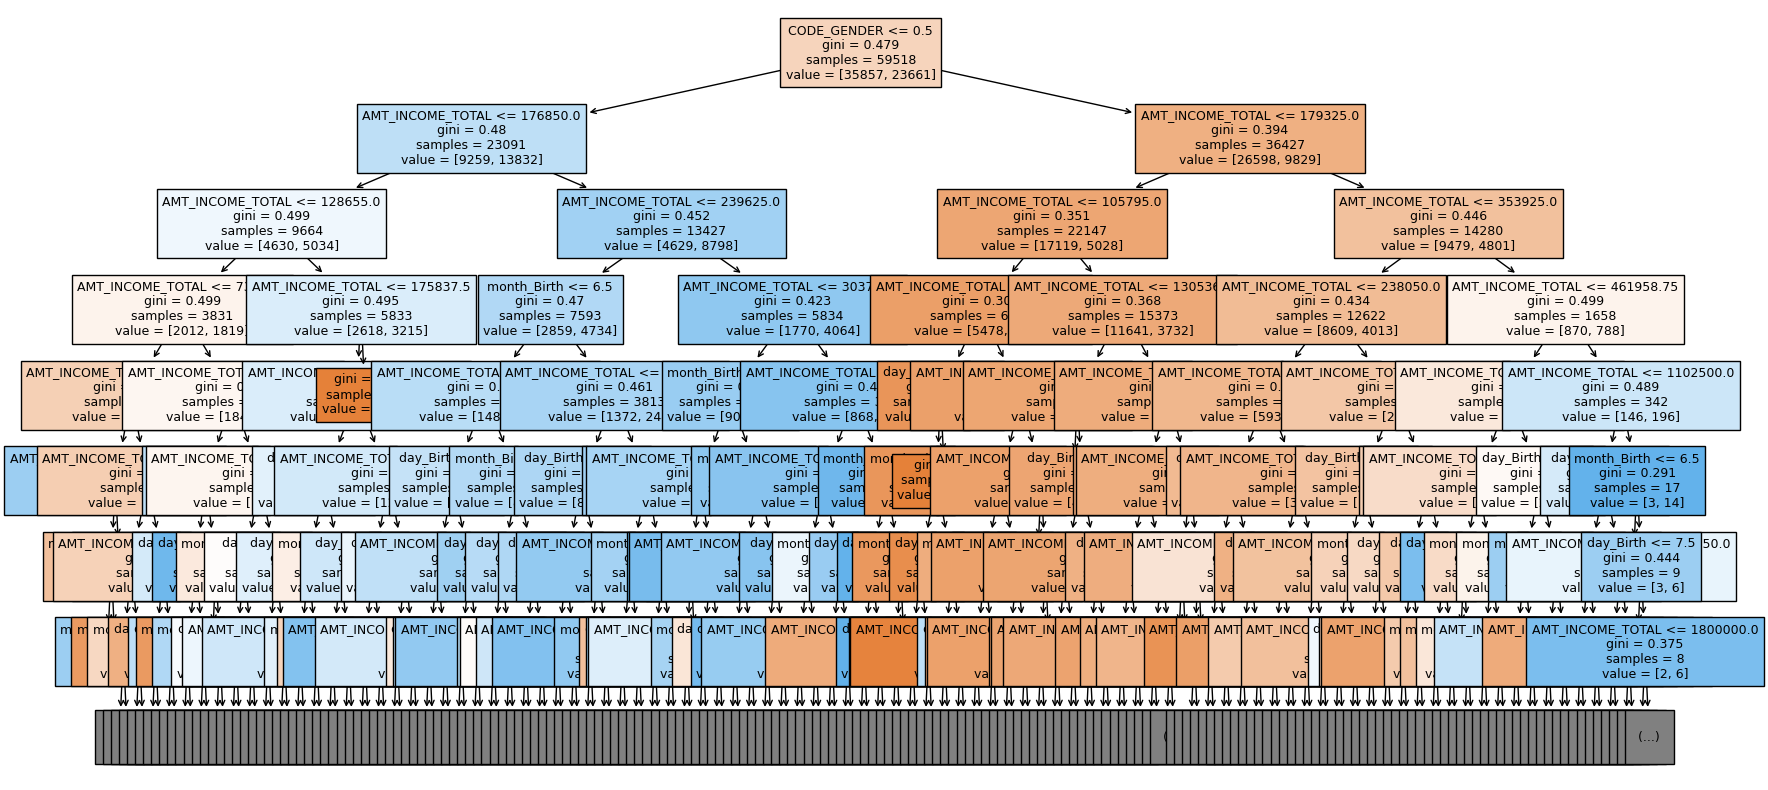

In [19]:
#visualize the tree (borrowed from practice project)
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model,
    max_depth=7,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

This is really only depth of 7, and the last time I checked, the tree has max depth 32.

In [20]:
model.tree_.max_depth

32

Check performance with test data

              precision    recall  f1-score   support

           0       0.66      0.77      0.71      8965
           1       0.54      0.40      0.46      5915

    accuracy                           0.62     14880
   macro avg       0.60      0.59      0.59     14880
weighted avg       0.61      0.62      0.61     14880



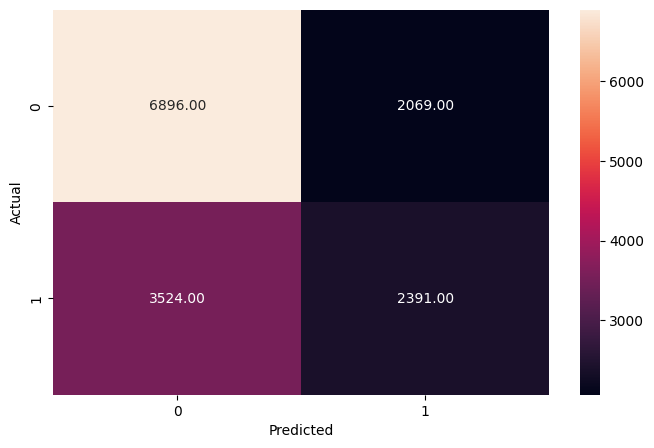

In [22]:
pred_test = model.predict(X_test)
metrics_score(y_test, pred_test)

The model clearly overfitted, but we can tune it to make it not overfit.

## Using grid search

In [23]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 100, 10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='precision',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=75, min_samples_split=10,
                       random_state=1)

Most of the times, it always returns the least max_depth, not sure why yet.

Fitting the best model returned by grid search and fitting with training data.

              precision    recall  f1-score   support

           0       0.72      0.78      0.75     35857
           1       0.62      0.55      0.58     23661

    accuracy                           0.69     59518
   macro avg       0.67      0.66      0.67     59518
weighted avg       0.68      0.69      0.68     59518



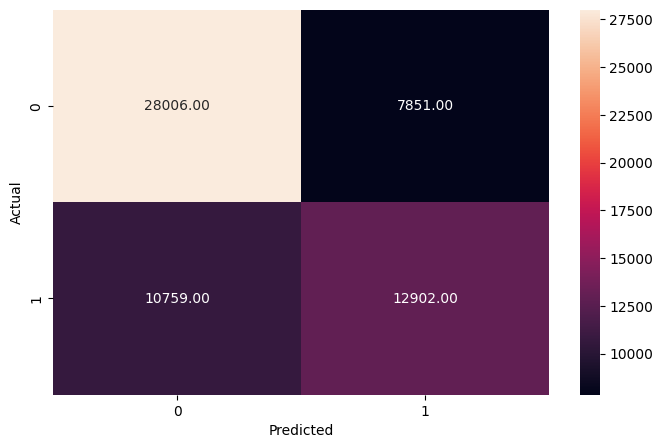

In [24]:
train_tuned = estimator.predict(X_train)
metrics_score(y_train, train_tuned)

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      8965
           1       0.62      0.53      0.57      5915

    accuracy                           0.68     14880
   macro avg       0.67      0.66      0.66     14880
weighted avg       0.68      0.68      0.68     14880



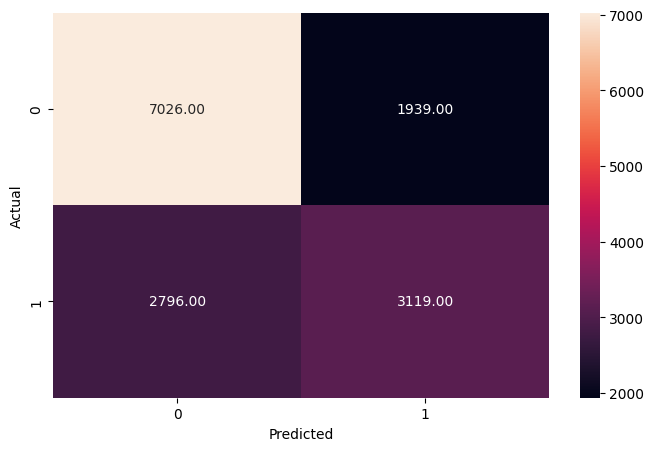

In [25]:
pred_tuned = estimator.predict(X_test)
metrics_score(y_test,pred_tuned)

Check the ratio of the majority class to see if the model performs better than a majority classifier model.

In [26]:
credit[predict].value_counts()

FLAG_OWN_CAR
0    44822
1    29576
Name: count, dtype: int64

In [27]:
44822 / len(credit)

0.6024624317858007

In [28]:
model.feature_importances_

array([0.2471362 , 0.2275473 , 0.2262037 , 0.29911279])

## Conclusion

* The model would initially overfit, 79% accuracy for training data and 62% accuracy for testing data, which is really not much better than the majority classifier
* We can always reduce overfitting by using hyperparameter tuning
* The model's not overfitting anymore with around 68% accuracy

## Intepretation

* Something I think that can be interpreted is that if an astrological app is predicting more than 68% of their users' specific feature correct, it might because it is using a model that is overfitted, and it is using data other than birthday
* If it gets around 68% correct, which is the best model accuracy I can get here, since I can always get about 68% accuracy with or without astrological data, the app might also just be using data other than birthday

# Random forest

Just trying out random forest model.

In [29]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83     35857
           1       0.77      0.67      0.71     23661

    accuracy                           0.79     59518
   macro avg       0.78      0.77      0.77     59518
weighted avg       0.79      0.79      0.78     59518



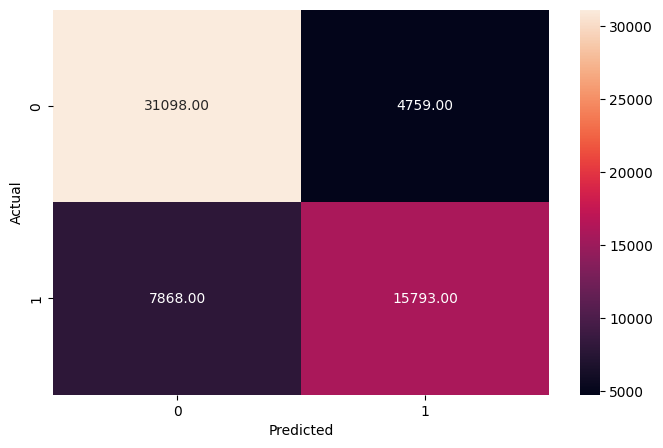

In [30]:
rf_train = rf.predict(X_train)
metrics_score(y_train, rf_train)

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      8965
           1       0.55      0.47      0.51      5915

    accuracy                           0.64     14880
   macro avg       0.61      0.61      0.61     14880
weighted avg       0.63      0.64      0.63     14880



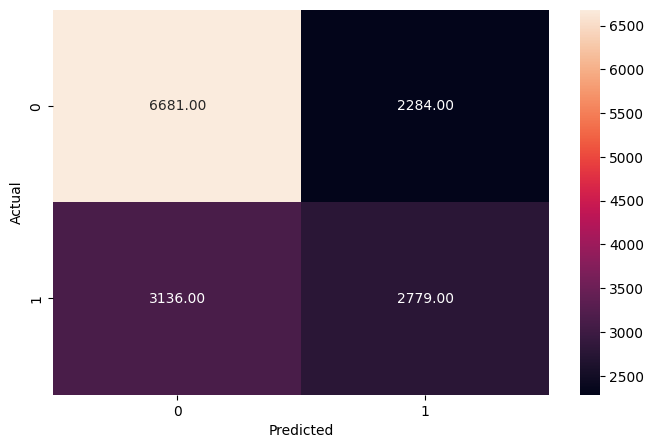

In [31]:
rf_pred = rf.predict(X_test)
metrics_score(y_test, rf_pred)

The model here also overfitted. It behaves similarly as a single tree, so I won't be spending time tuning it.

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

Trying to do feature selection, but not very helpful.

In [33]:
def stepwise_selection(X, y, initial_list=[], threshold_in=0.01, threshold_out = 0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [34]:
selected_features = stepwise_selection(credit.drop(columns = [predict, 'Date_Birth', 'Date_Employed', 'Sign_Birth']), y, threshold_in=0.05, threshold_out=0.10)
print("Selected features:", selected_features)

Add  AMT_INCOME_TOTAL               with p-value 0.0
Add  CODE_GENDER                    with p-value 0.0
Add  CNT_FAM_MEMBERS                with p-value 9.12472e-189
Add  NAME_EDUCATION_TYPE            with p-value 9.29421e-74
Add  CNT_CHILDREN                   with p-value 8.27109e-52
Add  FLAG_OWN_REALTY                with p-value 2.02016e-06
Add  higher_Sign_Birth              with p-value 2.96486e-07
Add  NAME_FAMILY_STATUS             with p-value 3.48538e-07
Add  NAME_HOUSING_TYPE              with p-value 0.042266
Selected features: ['AMT_INCOME_TOTAL', 'CODE_GENDER', 'CNT_FAM_MEMBERS', 'NAME_EDUCATION_TYPE', 'CNT_CHILDREN', 'FLAG_OWN_REALTY', 'higher_Sign_Birth', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
